In [1]:
# modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# load the data
nasa_csv = pd.read_csv('nasa.csv', index_col=0)
space_csv = pd.read_csv('first.csv', index_col=0)

In [3]:
nasa_csv.head()

,Start_Datetime,End_Datetime,startFrequency,endFrequency,flare_Location,flare_region,importance,CME_Date,CME_Time,width,speed,CPA,is_halo,lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,04/01,15:18,79,312.0,74,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,04/07,14:27,360,878.0,na,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,05/12,05:30,360,464.0,na,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,05/21,21:00,165,296.0,263,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,09/23,22:02,155,712.0,133,False,False


In [4]:
space_csv.tail()

,Rank,X_class,Region,Start_time,Max_time,End_time
45,46,X2.7,2339,2015-05-05 22:05:00,2015-05-05 22:11:00,2015-05-05 22:15:00
46,47,X2.7,488,2003-11-03 01:09:00,2003-11-03 01:30:00,2003-11-03 01:45:00
47,48,X2.7,8210,1998-05-06 07:58:00,1998-05-06 08:09:00,1998-05-06 08:20:00
48,49,X2.6,720,2005-01-15 22:25:00,2005-01-15 23:02:00,2005-01-15 23:31:00
49,50,X2.6,9632,2001-09-24 09:32:00,2001-09-24 10:38:00,2001-09-24 11:09:00


# Replication  

In [5]:
def seperateImportance(df, col_name='importance', numbers=True, letters=True):
    if letters:
        df['importance_1'] = df[col_name].str.slice(start=0, stop=1)
    if numbers:
        df['importance_2'] = df[col_name].str.slice(start=1).astype('float')
    return df

In [6]:
#nasa_csv.dropna(subset=['importance'], inplace=True)

In [7]:
nasa_csv = nasa_csv[nasa_csv.importance != 'FILA']

In [8]:
#nasa_csv['importance_1'] = nasa_csv['importance'].str.slice(start=0, stop=1)
#nasa_csv['importance_2'] = nasa_csv['importance'].str.slice(start=1).astype('float')
nasa_csv = seperateImportance(nasa_csv, 'importance')

In [9]:
nasa_csv.dtypes

Start_Datetime     object
End_Datetime       object
startFrequency     object
endFrequency       object
flare_Location     object
flare_region       object
importance         object
CME_Date           object
CME_Time           object
width              object
speed             float64
CPA                object
is_halo              bool
lower_bound          bool
importance_1       object
importance_2      float64
dtype: object

In [10]:
nasa_csv = nasa_csv.sort_values(['importance_1', 'importance_2'], ascending=False)

In [11]:
nasa_csv.drop(['importance_1', 'importance_2'], axis=1, inplace=True)

In [12]:
nasa_csv[:50]

,Start_Datetime,End_Datetime,startFrequency,endFrequency,flare_Location,flare_region,importance,CME_Date,CME_Time,width,speed,CPA,is_halo,lower_bound
242,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,11/04,19:54,360,2657.0,na,True,False
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,04/02,22:06,244,2505.0,261,False,False
234,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,10/28,11:30,360,2459.0,na,True,False
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,04/15,14:06,167,1199.0,245,False,False
235,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,10/29,20:54,360,2029.0,na,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,11/06,12:10,360,1556.0,na,True,False
330,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,NaN,False,False
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,11/02,17:30,360,2598.0,na,True,False
290,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,01/20,06:54,360,882.0,na,True,False
360,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,08/09,08:12,360,1610.0,na,True,False


we found that most of the data are close but nasa's data seems to be more accurate and percise 

In [13]:
nasa_cols = list(nasa_csv.columns)
space_cols = list(space_csv.columns)
print('Nasa:', nasa_cols)
print('*'*7)
print('Space:',space_cols)

Nasa: ['Start_Datetime', 'End_Datetime', 'startFrequency', 'endFrequency', 'flare_Location', 'flare_region', 'importance', 'CME_Date', 'CME_Time', 'width', 'speed', 'CPA', 'is_halo', 'lower_bound']
*******
Space: ['Rank', 'X_class', 'Region', 'Start_time', 'Max_time', 'End_time']


**Intersection**: [Start_Datetime == Start_time,
                  End_Datetime == End_time,
                  flare_region == Region,
                  CME_Time = End_time-Start_time
                  importance = X_class              
]

In [14]:
nasa_50 = nasa_csv[:50]

In [15]:
nasa_50.tail()

,Start_Datetime,End_Datetime,startFrequency,endFrequency,flare_Location,flare_region,importance,CME_Date,CME_Time,width,speed,CPA,is_halo,lower_bound
287,2005-01-17 09:25:00,2005-01-17 16:00:00,14000,30,N15W25,10720,X2.0,01/17,09:30,360,2094.0,na,True,False
104,2000-11-25 19:00:00,2000-11-25 19:35:00,6000,2000,N20W23,9236,X1.9,11/25,19:31,360,671.0,na,True,False
49,1999-10-14 09:10:00,1999-10-14 10:00:00,14000,4000,N11E32,8731,X1.8,10/14,09:26,360,1250.0,na,True,False
102,2000-11-24 22:24:00,2000-11-24 22:36:00,4000,3000,N21W14,9236,X1.8,11/24,22:06,360,1005.0,na,True,False
191,2002-07-18 07:55:00,2002-07-18 08:45:00,14000,1500,N19W30,10030,X1.8,07/18,08:06,360,1099.0,na,True,False


# Integration  

- [x] get the common attributes
 - Start Time, End Stime, Region, CME Time, Importance

In [16]:
nasa_50[nasa_50.flare_region.duplicated(keep=False)].sort_values('flare_region')

,Start_Datetime,End_Datetime,startFrequency,endFrequency,flare_Location,flare_region,importance,CME_Date,CME_Time,width,speed,CPA,is_halo,lower_bound
195,2002-07-23 00:50:00,2002-07-23 04:00:00,11000,400,S13E72,10039,X4.8,07/23,00:42,360,2285.0,na,True,False
194,2002-07-20 21:30:00,2002-07-20 22:20:00,10000,2000,SE90b,10039,X3.3,07/20,22:06,360,1941.0,na,True,False
242,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,11/04,19:54,360,2657.0,na,True,False
234,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,10/28,11:30,360,2459.0,na,True,False
235,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,10/29,20:54,360,2029.0,na,True,False
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,11/02,17:30,360,2598.0,na,True,False
239,2003-11-03 01:15:00,2003-11-03 01:25:00,3000,1500,N10W83,10488,X2.7,11/03,01:59,65,827.0,304,False,False
240,2003-11-03 10:00:00,2003-11-03 12:30:00,6000,400,N08W77,10488,X3.9,11/03,10:06,103,1420.0,293,False,False
276,2004-11-07 16:25:00,2004-11-08 20:00:00,14000,60,N09W17,10696,X2.0,11/07,16:54,360,1759.0,na,True,False
278,2004-11-10 02:25:00,2004-11-10 03:40:00,14000,1000,N09W49,10696,X2.5,11/10,02:26,360,3387.0,na,True,False


In [17]:
nasa_50[nasa_50.flare_region.duplicated(keep=False)].sort_values('Start_Datetime')

,Start_Datetime,End_Datetime,startFrequency,endFrequency,flare_Location,flare_region,importance,CME_Date,CME_Time,width,speed,CPA,is_halo,lower_bound
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,11/04,06:10,360,785.0,na,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,11/06,12:10,360,1556.0,na,True,False
100,2000-11-24 05:10:00,2000-11-24 15:00:00,14000,100,N20W05,9236,X2.0,11/24,05:30,360,1289.0,na,True,False
101,2000-11-24 15:25:00,2000-11-24 22:00:00,14000,200,N22W07,9236,X2.3,11/24,15:30,360,1245.0,na,True,False
102,2000-11-24 22:24:00,2000-11-24 22:36:00,4000,3000,N21W14,9236,X1.8,11/24,22:06,360,1005.0,na,True,False
104,2000-11-25 19:00:00,2000-11-25 19:35:00,6000,2000,N20W23,9236,X1.9,11/25,19:31,360,671.0,na,True,False
106,2000-11-26 17:00:00,2000-11-26 17:15:00,14000,7000,N18W38,9236,X4.0,11/26,17:06,360,980.0,na,True,False
123,2001-04-06 19:35:00,2001-04-07 01:50:00,14000,230,S21E31,9415,X5.6,04/06,19:30,360,1270.0,na,True,False
125,2001-04-10 05:24:00,2001-04-11 00:00:00,14000,100,S23W09,9415,X2.3,04/10,05:30,360,2411.0,na,True,False
127,2001-04-12 10:20:00,2001-04-12 10:40:00,14000,7000,S19W43,9415,X2.0,04/12,10:31,360,1184.0,na,True,False


In [18]:
nasa_50

,Start_Datetime,End_Datetime,startFrequency,endFrequency,flare_Location,flare_region,importance,CME_Date,CME_Time,width,speed,CPA,is_halo,lower_bound
242,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,11/04,19:54,360,2657.0,na,True,False
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,04/02,22:06,244,2505.0,261,False,False
234,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,10/28,11:30,360,2459.0,na,True,False
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,04/15,14:06,167,1199.0,245,False,False
235,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,10/29,20:54,360,2029.0,na,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,11/06,12:10,360,1556.0,na,True,False
330,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,NaN,False,False
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,11/02,17:30,360,2598.0,na,True,False
290,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,01/20,06:54,360,882.0,na,True,False
360,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,08/09,08:12,360,1610.0,na,True,False


In [19]:
# importance to float and make it 4 digits
nasa_50.flare_region = nasa_50.flare_region.astype('float')

/home/kelwa/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [20]:
nasa_50.dtypes

Start_Datetime     object
End_Datetime       object
startFrequency     object
endFrequency       object
flare_Location     object
flare_region      float64
importance         object
CME_Date           object
CME_Time           object
width              object
speed             float64
CPA                object
is_halo              bool
lower_bound          bool
dtype: object

In [21]:
nasa_50.flare_region = nasa_50.flare_region.apply(lambda x:x-10000 if x>10000 else x)

In [22]:
nasa_50.flare_region

242     486.0
119    9393.0
234     486.0
128    9415.0
235     486.0
8      8100.0
330     930.0
238     486.0
290     720.0
360    1263.0
333     930.0
319     808.0
83     9077.0
123    9415.0
376    1429.0
137    9591.0
444    1990.0
195      39.0
106    9236.0
240     488.0
289     720.0
223     365.0
162    9756.0
334     930.0
194      39.0
405    1748.0
202      69.0
404    1748.0
19     8210.0
239     488.0
9      8113.0
144    9632.0
286     720.0
278     696.0
73     9026.0
101    9236.0
125    9415.0
347    1158.0
7      8100.0
320     808.0
362    1283.0
421    1882.0
100    9236.0
127    9415.0
276     696.0
287     720.0
104    9236.0
49     8731.0
102    9236.0
191      30.0
Name: flare_region, dtype: float64

In [23]:
nasa_50[nasa_50.flare_region.duplicated(keep=False)].sort_values('flare_region')

,Start_Datetime,End_Datetime,startFrequency,endFrequency,flare_Location,flare_region,importance,CME_Date,CME_Time,width,speed,CPA,is_halo,lower_bound
195,2002-07-23 00:50:00,2002-07-23 04:00:00,11000,400,S13E72,39.0,X4.8,07/23,00:42,360,2285.0,na,True,False
194,2002-07-20 21:30:00,2002-07-20 22:20:00,10000,2000,SE90b,39.0,X3.3,07/20,22:06,360,1941.0,na,True,False
242,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,486.0,X28.,11/04,19:54,360,2657.0,na,True,False
234,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,486.0,X17.,10/28,11:30,360,2459.0,na,True,False
235,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,486.0,X10.,10/29,20:54,360,2029.0,na,True,False
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,486.0,X8.3,11/02,17:30,360,2598.0,na,True,False
239,2003-11-03 01:15:00,2003-11-03 01:25:00,3000,1500,N10W83,488.0,X2.7,11/03,01:59,65,827.0,304,False,False
240,2003-11-03 10:00:00,2003-11-03 12:30:00,6000,400,N08W77,488.0,X3.9,11/03,10:06,103,1420.0,293,False,False
276,2004-11-07 16:25:00,2004-11-08 20:00:00,14000,60,N09W17,696.0,X2.0,11/07,16:54,360,1759.0,na,True,False
278,2004-11-10 02:25:00,2004-11-10 03:40:00,14000,1000,N09W49,696.0,X2.5,11/10,02:26,360,3387.0,na,True,False


In [24]:
nasa_50_small = nasa_50[['importance', 'flare_region', 'Start_Datetime', 'End_Datetime', 'CME_Time']]
space_small = space_csv.drop(['Rank'], axis=1)

In [25]:
space_small.head()

,X_class,Region,Start_time,Max_time,End_time
0,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


In [26]:
space_small.Start_time = pd.to_datetime(space_small.Start_time)
space_small.End_time = pd.to_datetime(space_small.End_time)
space_small.Max_time = pd.to_datetime(space_small.Max_time)

nasa_50_small.Start_Datetime = pd.to_datetime(nasa_50_small.Start_Datetime)
nasa_50_small.End_Datetime = pd.to_datetime(nasa_50_small.End_Datetime)
nasa_50_small.CME_Time = pd.to_datetime(nasa_50_small.CME_Time)

/home/kelwa/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [27]:
space_small

,X_class,Region,Start_time,Max_time,End_time
0,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [28]:
nasa_50_small

,importance,flare_region,Start_Datetime,End_Datetime,CME_Time
242,X28.,486.0,2003-11-04 20:00:00,2003-11-05 00:00:00,2020-03-23 19:54:00
119,X20.,9393.0,2001-04-02 22:05:00,2001-04-03 02:30:00,2020-03-23 22:06:00
234,X17.,486.0,2003-10-28 11:10:00,2003-10-30 00:00:00,2020-03-23 11:30:00
128,X14.,9415.0,2001-04-15 14:05:00,2001-04-16 13:00:00,2020-03-23 14:06:00
235,X10.,486.0,2003-10-29 20:55:00,2003-10-30 00:00:00,2020-03-23 20:54:00
8,X9.4,8100.0,1997-11-06 12:20:00,1997-11-07 08:30:00,2020-03-23 12:10:00
330,X9.0,930.0,2006-12-05 10:50:00,2006-12-05 20:00:00,NaT
238,X8.3,486.0,2003-11-02 17:30:00,2003-11-03 01:00:00,2020-03-23 17:30:00
290,X7.1,720.0,2005-01-20 07:15:00,2005-01-20 16:30:00,2020-03-23 06:54:00
360,X6.9,1263.0,2011-08-09 08:20:00,2011-08-09 08:35:00,2020-03-23 08:12:00


### Criteria
1. Region -> Matching(Equality)
2. get the row with the minimum starting date

In [29]:
space_small.dtypes

X_class               object
Region                 int64
Start_time    datetime64[ns]
Max_time      datetime64[ns]
End_time      datetime64[ns]
dtype: object

In [30]:
nasa_50_small.dtypes

importance                object
flare_region             float64
Start_Datetime    datetime64[ns]
End_Datetime      datetime64[ns]
CME_Time          datetime64[ns]
dtype: object

In [31]:
nasa_50_small.rename(columns={'flare_region':'Region'}, inplace=True)

/home/kelwa/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [32]:
row = space_small.loc[0];row

X_class                      X28+
Region                        486
Start_time    2003-11-04 19:29:00
Max_time      2003-11-04 19:53:00
End_time      2003-11-04 20:06:00
Name: 0, dtype: object

In [33]:
rows = []
for row in space_small.itertuples(index=False):
    same_day = {}
    for r in nasa_50_small.itertuples(index=False):
        if r[1] == row[1]:
            same_day[abs(r[2] - row[2])] = r
    if len(same_day) > 0:
        rows.append(same_day[min(same_day.keys())])

In [34]:
rows

[Pandas(importance='X28.', Region=486.0, Start_Datetime=Timestamp('2003-11-04 20:00:00'), End_Datetime=Timestamp('2003-11-05 00:00:00'), CME_Time=Timestamp('2020-03-23 19:54:00')),
 Pandas(importance='X20.', Region=9393.0, Start_Datetime=Timestamp('2001-04-02 22:05:00'), End_Datetime=Timestamp('2001-04-03 02:30:00'), CME_Time=Timestamp('2020-03-23 22:06:00')),
 Pandas(importance='X17.', Region=486.0, Start_Datetime=Timestamp('2003-10-28 11:10:00'), End_Datetime=Timestamp('2003-10-30 00:00:00'), CME_Time=Timestamp('2020-03-23 11:30:00')),
 Pandas(importance='X6.2', Region=808.0, Start_Datetime=Timestamp('2005-09-09 19:45:00'), End_Datetime=Timestamp('2005-09-09 22:00:00'), CME_Time=Timestamp('2020-03-23 19:48:00')),
 Pandas(importance='X14.', Region=9415.0, Start_Datetime=Timestamp('2001-04-15 14:05:00'), End_Datetime=Timestamp('2001-04-16 13:00:00'), CME_Time=Timestamp('2020-03-23 14:06:00')),
 Pandas(importance='X10.', Region=486.0, Start_Datetime=Timestamp('2003-10-29 20:55:00'), End

In [35]:
df = pd.DataFrame(rows)

In [36]:
df

,importance,Region,Start_Datetime,End_Datetime,CME_Time
0,X28.,486.0,2003-11-04 20:00:00,2003-11-05 00:00:00,2020-03-23 19:54:00
1,X20.,9393.0,2001-04-02 22:05:00,2001-04-03 02:30:00,2020-03-23 22:06:00
2,X17.,486.0,2003-10-28 11:10:00,2003-10-30 00:00:00,2020-03-23 11:30:00
3,X6.2,808.0,2005-09-09 19:45:00,2005-09-09 22:00:00,2020-03-23 19:48:00
4,X14.,9415.0,2001-04-15 14:05:00,2001-04-16 13:00:00,2020-03-23 14:06:00
5,X10.,486.0,2003-10-29 20:55:00,2003-10-30 00:00:00,2020-03-23 20:54:00
6,X9.4,8100.0,1997-11-06 12:20:00,1997-11-07 08:30:00,2020-03-23 12:10:00
7,X9.0,930.0,2006-12-05 10:50:00,2006-12-05 20:00:00,NaT
8,X8.3,486.0,2003-11-02 17:30:00,2003-11-03 01:00:00,2020-03-23 17:30:00
9,X7.1,720.0,2005-01-20 07:15:00,2005-01-20 16:30:00,2020-03-23 06:54:00


# Another one 

In [38]:
# seperate the value of the X-class from nasa
nasa_50_small = seperateImportance(nasa_50_small, letters=False)

/home/kelwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [39]:
# remove the char in the last
space_small['X_class'] = space_small['X_class'].apply(lambda x: x[:-1] if x[-1] == '+' else x)
# seperate the value of the X-class from space
space_small = seperateImportance(space_small, 'X_class', letters=False)

In [40]:
nasa_50_small.head()

,importance,Region,Start_Datetime,End_Datetime,CME_Time,importance_2
242,X28.,486.0,2003-11-04 20:00:00,2003-11-05 00:00:00,2020-03-23 19:54:00,28.0
119,X20.,9393.0,2001-04-02 22:05:00,2001-04-03 02:30:00,2020-03-23 22:06:00,20.0
234,X17.,486.0,2003-10-28 11:10:00,2003-10-30 00:00:00,2020-03-23 11:30:00,17.0
128,X14.,9415.0,2001-04-15 14:05:00,2001-04-16 13:00:00,2020-03-23 14:06:00,14.0
235,X10.,486.0,2003-10-29 20:55:00,2003-10-30 00:00:00,2020-03-23 20:54:00,10.0


In [41]:
space_small.head()

,X_class,Region,Start_time,Max_time,End_time,importance_2
0,X28,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,28.0
1,X20,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,20.0
2,X17.2,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,17.2
3,X17,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,17.0
4,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,14.4


In [42]:
rows = []
for row in space_small.itertuples(index=False):
    near_x = {}
    for r in nasa_50_small.itertuples(index=False):
        near_x[abs(r[5] - row[5])] = r
    if len(near_x) > 0:
        rows.append(near_x[min(near_x.keys())])

In [43]:
df = pd.DataFrame(rows); df

,importance,Region,Start_Datetime,End_Datetime,CME_Time,importance_2
0,X28.,486.0,2003-11-04 20:00:00,2003-11-05 00:00:00,2020-03-23 19:54:00,28.0
1,X20.,9393.0,2001-04-02 22:05:00,2001-04-03 02:30:00,2020-03-23 22:06:00,20.0
2,X17.,486.0,2003-10-28 11:10:00,2003-10-30 00:00:00,2020-03-23 11:30:00,17.0
3,X17.,486.0,2003-10-28 11:10:00,2003-10-30 00:00:00,2020-03-23 11:30:00,17.0
4,X14.,9415.0,2001-04-15 14:05:00,2001-04-16 13:00:00,2020-03-23 14:06:00,14.0
5,X10.,486.0,2003-10-29 20:55:00,2003-10-30 00:00:00,2020-03-23 20:54:00,10.0
6,X9.4,8100.0,1997-11-06 12:20:00,1997-11-07 08:30:00,2020-03-23 12:10:00,9.4
7,X9.4,8100.0,1997-11-06 12:20:00,1997-11-07 08:30:00,2020-03-23 12:10:00,9.4
8,X9.0,930.0,2006-12-05 10:50:00,2006-12-05 20:00:00,NaT,9.0
9,X8.3,486.0,2003-11-02 17:30:00,2003-11-03 01:00:00,2020-03-23 17:30:00,8.3


In [44]:
def bestMatching(df1=space_small, df2=nasa_50_small):
    # seperate the value of the X-class/Importance from space
    df1 = seperateImportance(df1, 'X_class', letters=False)
    df2 = seperateImportance(df2, letters=False)
    
    rows = []
    for row in df1.itertuples(index=False):
        near_x = {}
        for r in df2.itertuples(index=False):
            near_x[abs(r[5] - row[5])] = r
        if len(near_x) > 0:
            rows.append(near_x[min(near_x.keys())])
        # calc mean error
        mean_error = abs(pd.DataFrame(rows).importance_2 - df1.importance_2).mean()
    return pd.DataFrame(rows).drop('importance_2', axis=1), mean_error

In [45]:
nasa_50_small_best_matching, mean_error = bestMatching()
print(f'Mean Error: {mean_error}')
nasa_50_small_best_matching

Mean Error: 0.020000000000000007


/home/kelwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,importance,Region,Start_Datetime,End_Datetime,CME_Time
0,X28.,486.0,2003-11-04 20:00:00,2003-11-05 00:00:00,2020-03-23 19:54:00
1,X20.,9393.0,2001-04-02 22:05:00,2001-04-03 02:30:00,2020-03-23 22:06:00
2,X17.,486.0,2003-10-28 11:10:00,2003-10-30 00:00:00,2020-03-23 11:30:00
3,X17.,486.0,2003-10-28 11:10:00,2003-10-30 00:00:00,2020-03-23 11:30:00
4,X14.,9415.0,2001-04-15 14:05:00,2001-04-16 13:00:00,2020-03-23 14:06:00
5,X10.,486.0,2003-10-29 20:55:00,2003-10-30 00:00:00,2020-03-23 20:54:00
6,X9.4,8100.0,1997-11-06 12:20:00,1997-11-07 08:30:00,2020-03-23 12:10:00
7,X9.4,8100.0,1997-11-06 12:20:00,1997-11-07 08:30:00,2020-03-23 12:10:00
8,X9.0,930.0,2006-12-05 10:50:00,2006-12-05 20:00:00,NaT
9,X8.3,486.0,2003-11-02 17:30:00,2003-11-03 01:00:00,2020-03-23 17:30:00


# Plotting 

In [46]:
nasa_50.dtypes

Start_Datetime     object
End_Datetime       object
startFrequency     object
endFrequency       object
flare_Location     object
flare_region      float64
importance         object
CME_Date           object
CME_Time           object
width              object
speed             float64
CPA                object
is_halo              bool
lower_bound          bool
dtype: object

In [47]:
nasa_50.Start_Datetime = pd.to_datetime(nasa_50.Start_Datetime)
nasa_50.End_Datetime = pd.to_datetime(nasa_50.End_Datetime)
nasa_50.CME_Time = pd.to_datetime(nasa_50.CME_Time)

nasa_csv.Start_Datetime = pd.to_datetime(nasa_csv.Start_Datetime)
nasa_csv.End_Datetime = pd.to_datetime(nasa_csv.End_Datetime)
nasa_csv.CME_Time = pd.to_datetime(nasa_csv.CME_Time)

/home/kelwa/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [48]:
nasa_50.dtypes

Start_Datetime    datetime64[ns]
End_Datetime      datetime64[ns]
startFrequency            object
endFrequency              object
flare_Location            object
flare_region             float64
importance                object
CME_Date                  object
CME_Time          datetime64[ns]
width                     object
speed                    float64
CPA                       object
is_halo                     bool
lower_bound                 bool
dtype: object

In [49]:
nasa_50.head()

,Start_Datetime,End_Datetime,startFrequency,endFrequency,flare_Location,flare_region,importance,CME_Date,CME_Time,width,speed,CPA,is_halo,lower_bound
242,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,486.0,X28.,11/04,2020-03-23 19:54:00,360,2657.0,na,True,False
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393.0,X20.,04/02,2020-03-23 22:06:00,244,2505.0,261,False,False
234,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,486.0,X17.,10/28,2020-03-23 11:30:00,360,2459.0,na,True,False
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415.0,X14.,04/15,2020-03-23 14:06:00,167,1199.0,245,False,False
235,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,486.0,X10.,10/29,2020-03-23 20:54:00,360,2029.0,na,True,False


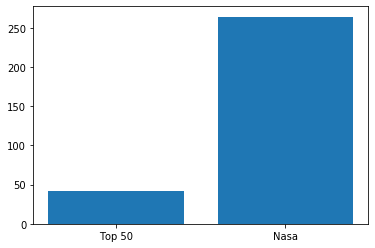

In [50]:
# no 2
sums = [nasa_50.is_halo.sum(), nasa_csv.is_halo.sum()]
plt.bar(['Top 50', 'Nasa'], sums)
plt.show()

In [51]:
nasa_50.Start_Datetime.iloc[0].month

11

In [52]:
flares_num = {}
for t in nasa_50.Start_Datetime:
    if t.month in flares_num:
        flares_num[t.month] += 1
    else:
        flares_num[t.month] = 1

In [53]:
def flares_per_month(df):
    flares_num = {}
    for t in df.Start_Datetime:
        if t.month in flares_num:
            flares_num[t.month] += 1
        else:
            flares_num[t.month] = 1
            
    return flares_num

In [54]:
flares_num_50 = flares_per_month(nasa_50)

In [55]:
flares_num_50

{11: 14, 4: 5, 10: 4, 12: 4, 1: 4, 8: 3, 9: 4, 7: 4, 3: 1, 2: 2, 5: 4, 6: 1}

In [56]:
len(flares_num_50)

12

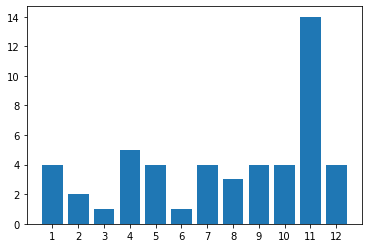

In [57]:
plt.bar(flares_num_50.keys(), flares_num_50.values())
plt.xticks(range(1,13))
plt.show()

In [58]:
flares_num_all = flares_per_month(nasa_csv)
len(flares_num_all)

12

In [59]:
flares_num_all

{11: 63,
 4: 46,
 10: 41,
 12: 35,
 1: 37,
 8: 37,
 9: 42,
 7: 43,
 3: 37,
 2: 16,
 5: 44,
 6: 40}

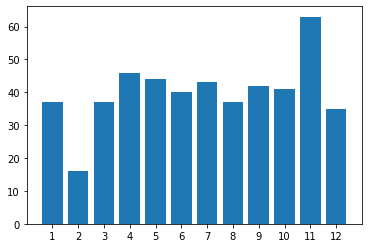

In [60]:
plt.bar(flares_num_all.keys(), flares_num_all.values())
plt.xticks(range(1,13))
plt.show()

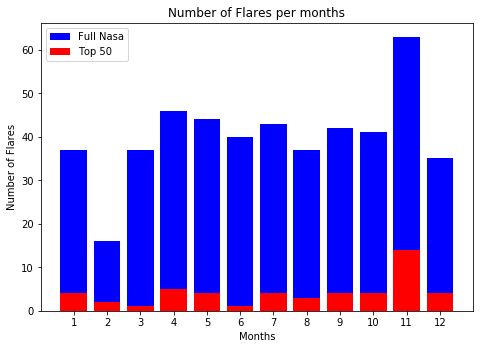

In [61]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(flares_num_all.keys(), flares_num_all.values(), color='b')
ax.bar(flares_num_50.keys(), flares_num_50.values(), color='r')
ax.set_ylabel('Number of Flares')
ax.set_xlabel('Months')
ax.set_title('Number of Flares per months')
ax.set_xticks(range(1, 13))
ax.legend(labels=['Full Nasa', 'Top 50'])
plt.show()